<a href="https://colab.research.google.com/github/tekgulburak/FrozenLake-v1/blob/main/FrozenLake_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gymnasium


In [ ]:
import random
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

There are F,G,H,S letters.These means are:

*   S:Start
*   F:Frozen
*   H=Hole
*   G:Goal


In [ ]:
env=gym.make("FrozenLake-v1",map_name="8x8",render_mode="rgb_array",is_slippery=False)
#I will use 8x8 map.


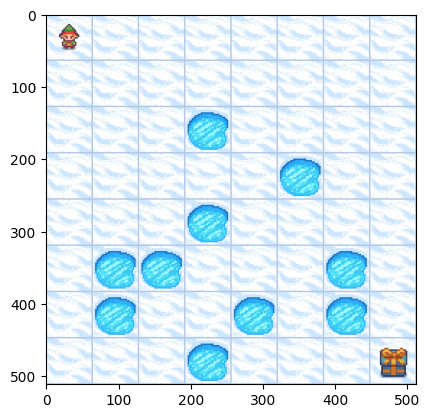

In [ ]:
env.reset()
img=env.render()
plt.imshow(img)
plt.show()

In [ ]:
n_states=env.observation_space.n
n_actions=env.action_space.n

In [ ]:
print(f" num of states:{n_states}\n num of actions:{n_actions}")

 num of states:64
 num of actions:4


Let's look at the agent before training

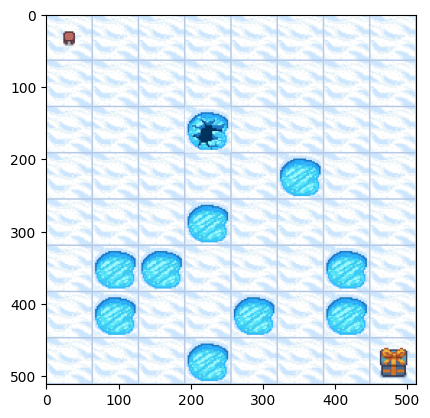

In [ ]:
state,info=env.reset()
img=plt.imshow(env.render())
while True:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    img.set_data(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if terminated:
            break


Implement and update Q-table

In [ ]:
Q=np.zeros([n_states,n_actions])
Q.shape

(64, 4)

In [ ]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [ ]:
episodes=10000
alpha=0.5
gamma=0.9
G=0 #G is sum of rewards

In [ ]:
for episode in range(1,episodes+1):
  state=env.reset()[0] # I use env.reset()[0] because there two variables are coming from env.reset().The state value is env.reset()[0].You can print to see that what i mean >> print(env.reset())
  done=False
  G=0
  while not done:
    # Select the action that has the highest value in the current state.
    if np.max(Q[state]) > 0:
        action = np.argmax(Q[state])

    # If there's no best action (only zeros), take a random one
    else:
        action = env.action_space.sample()

    new_state,reward,done,info,a=env.step(action)
    Q[state,action]+=alpha*(reward+gamma*np.max(Q[new_state])-Q[state,action])
    G+=reward
    state=new_state
  if episode%100==0:
      print(f"episode {episode} sum of  reward :{G}")




episode 100 sum of  reward :0.0
episode 200 sum of  reward :0.0
episode 300 sum of  reward :0.0
episode 400 sum of  reward :0.0
episode 500 sum of  reward :0.0
episode 600 sum of  reward :0.0
episode 700 sum of  reward :1.0
episode 800 sum of  reward :1.0
episode 900 sum of  reward :1.0
episode 1000 sum of  reward :1.0
episode 1100 sum of  reward :1.0
episode 1200 sum of  reward :1.0
episode 1300 sum of  reward :1.0
episode 1400 sum of  reward :1.0
episode 1500 sum of  reward :1.0
episode 1600 sum of  reward :1.0
episode 1700 sum of  reward :1.0
episode 1800 sum of  reward :1.0
episode 1900 sum of  reward :1.0
episode 2000 sum of  reward :1.0
episode 2100 sum of  reward :1.0
episode 2200 sum of  reward :1.0
episode 2300 sum of  reward :1.0
episode 2400 sum of  reward :1.0
episode 2500 sum of  reward :1.0
episode 2600 sum of  reward :1.0
episode 2700 sum of  reward :1.0
episode 2800 sum of  reward :1.0
episode 2900 sum of  reward :1.0
episode 3000 sum of  reward :1.0
episode 3100 sum of

In [ ]:
Q

array([[0.        , 0.        , 0.25418658, 0.        ],
       [0.        , 0.        , 0.28242954, 0.        ],
       [0.        , 0.        , 0.3138106 , 0.        ],
       [0.        , 0.        , 0.34867844, 0.        ],
       [0.        , 0.38742049, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01447969, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00242627, 0.        ],
       [0.        , 0.        , 0.        , 0.01553108],
       [0.        , 0.        , 0.43046721, 0.        ],
       [0.        , 0.        , 0.4782969 , 0.        ],
       [0.        , 0.531441  , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

Let's test the environment

In [ ]:
state=env.reset()[0]
done=False

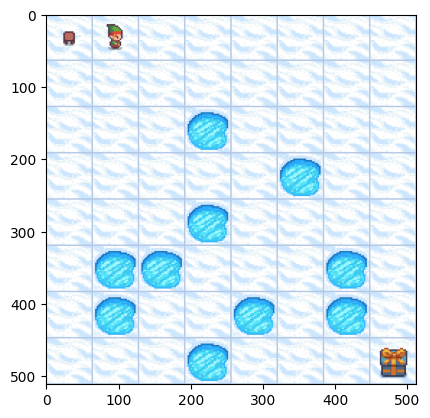

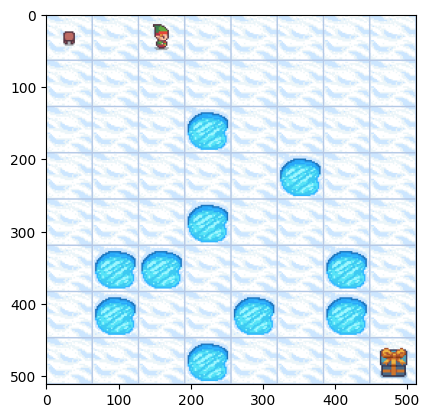

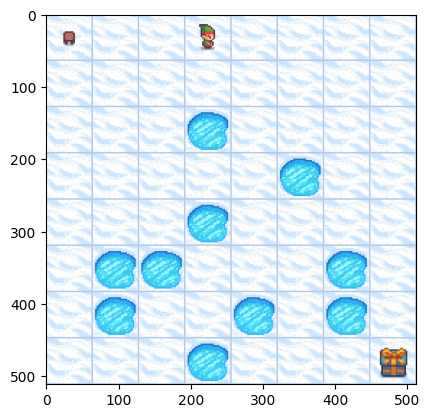

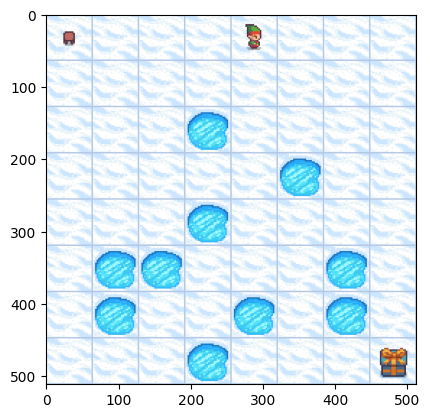

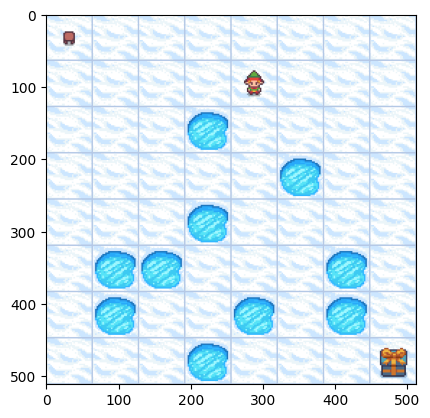

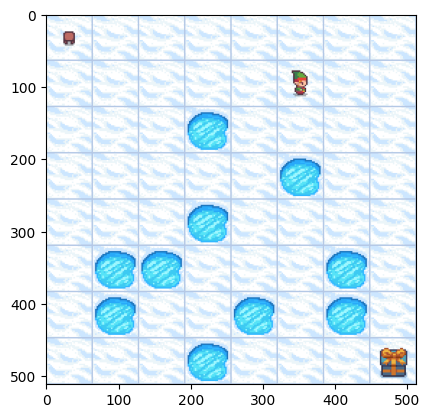

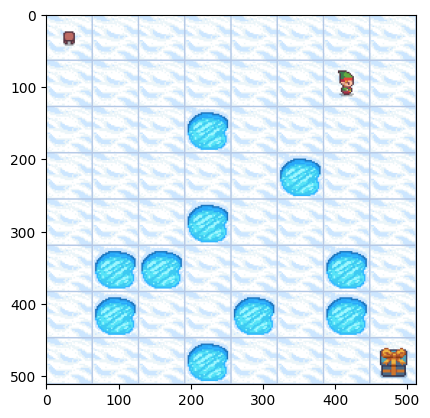

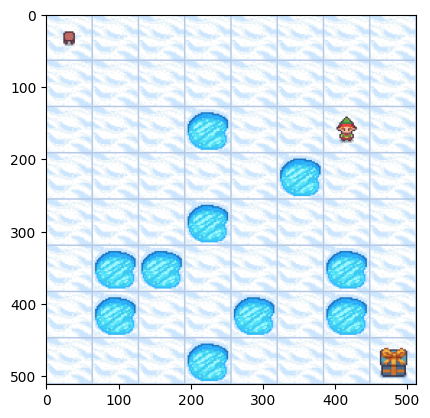

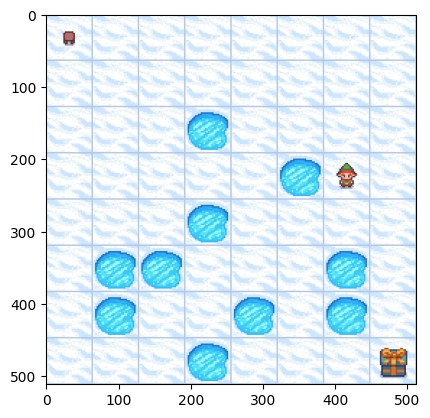

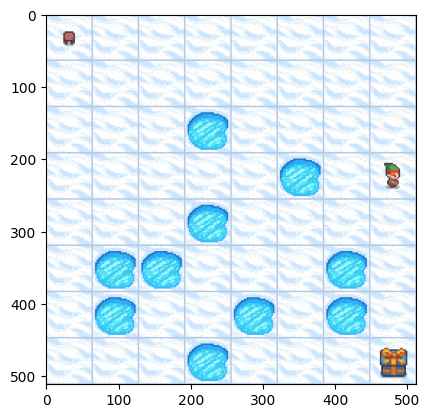

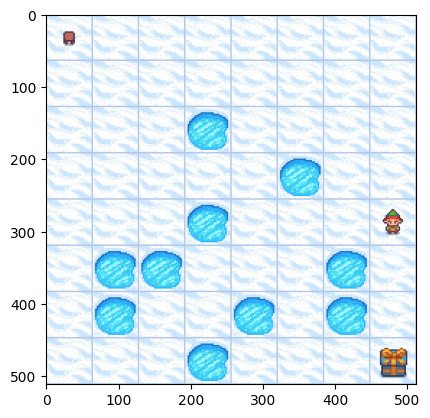

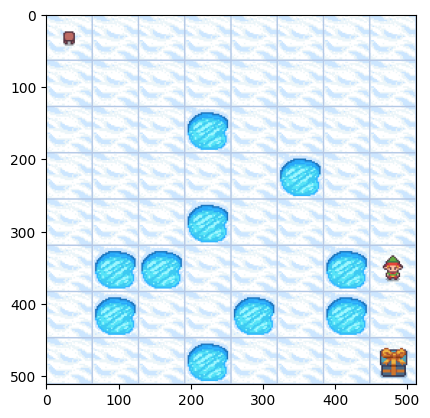

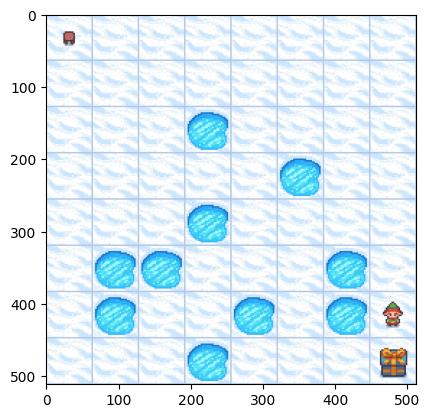

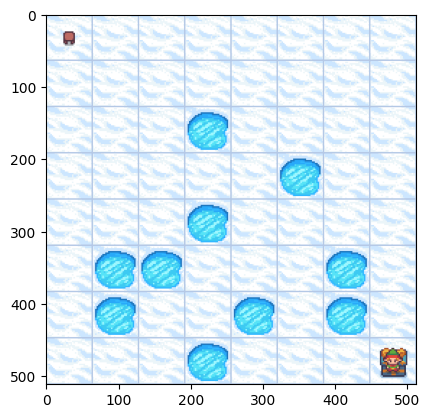

In [ ]:
while not done:
  if np.max(Q[state])>0:
    action=np.argmax(Q[state])

  else:
    action=env.action_space.sample()

  new_state,reward,done,info,x=env.step(action)
  img=env.render()
  plt.imshow(img)
  plt.show()
  state=new_state

Or you can use display from IPython

In [ ]:
state=env.reset()[0]
done=False

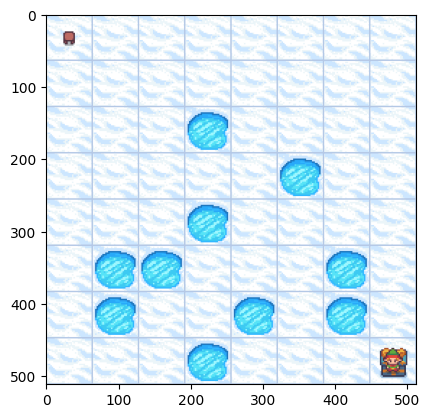

In [ ]:
while not done:
  if np.max(Q[state])>0:
    action=np.argmax(Q[state])

  else:
    action=env.action_space.sample()

  new_state,reward,done,info,x=env.step(action)

  img=plt.imshow(env.render())
  display.display(plt.gcf())
  display.clear_output(wait=True)

  state=new_state

# IT IS DONE 😍😍😍

# I HOPE YOU ENJOYED.HAPPY CODING 🎉🎉🎉